<a href="https://colab.research.google.com/github/AbhiramNallamothu/excercies_5731/blob/main/Abhiram_Nallamothu_Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [1]:
import gensim
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from pprint import pprint

# Prepare the text data
data = "I loved the movie! The plot was amazing, and the acting was superb. Highly recommended!👌"
# Tokenize the text
tokens = [simple_preprocess(sentence) for sentence in data.split('. ')]

# Create Dictionary and Corpus
id2word = Dictionary(tokens)
corpus = [id2word.doc2bow(text) for text in tokens]

# Function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=100, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())

    return model_list, coherence_values

# Determine the optimal number of topics
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=tokens, start=2, limit=10, step=1)

# Find the index of the maximum coherence value
optimal_index = coherence_values.index(max(coherence_values))

# Select the model with the highest coherence value
optimal_model = model_list[optimal_index]

# Print the optimal number of topics
optimal_num_topics = optimal_index + 2  # Adding 2 because range starts from 2
print("Optimal number of topics (K):", optimal_num_topics)

# Print the topics and their numbers
topics = optimal_model.print_topics(num_words=5)
for i, topic in enumerate(topics):
    print("Topic", i+1, ":", topic)


Optimal number of topics (K): 8
Topic 1 : (0, '0.091*"recommended" + 0.091*"highly" + 0.091*"was" + 0.091*"the" + 0.091*"plot"')
Topic 2 : (1, '0.091*"highly" + 0.091*"recommended" + 0.091*"was" + 0.091*"the" + 0.091*"movie"')
Topic 3 : (2, '0.333*"recommended" + 0.333*"highly" + 0.037*"was" + 0.037*"plot" + 0.037*"and"')
Topic 4 : (3, '0.091*"highly" + 0.091*"recommended" + 0.091*"the" + 0.091*"was" + 0.091*"movie"')
Topic 5 : (4, '0.091*"highly" + 0.091*"recommended" + 0.091*"was" + 0.091*"the" + 0.091*"superb"')
Topic 6 : (5, '0.091*"highly" + 0.091*"recommended" + 0.091*"the" + 0.091*"was" + 0.091*"plot"')
Topic 7 : (6, '0.091*"highly" + 0.091*"recommended" + 0.091*"the" + 0.091*"was" + 0.091*"plot"')
Topic 8 : (7, '0.234*"the" + 0.159*"was" + 0.084*"acting" + 0.084*"loved" + 0.084*"superb"')


In [2]:
pip install nltk

## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [3]:
import nltk
nltk.download('stopwords')

# Now you can continue with your existing code
from gensim.models import LsiModel
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import numpy as np

# Define the data
data = "I loved the movie! The plot was amazing, and the acting was superb. Highly recommended!👌"
# Preprocess the data
def preprocess_data(data):
    tokenizer = RegexpTokenizer(r'\w+')
    en_stop = set(stopwords.words('english'))
    p_stemmer = PorterStemmer()
    raw = data.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in en_stop]
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    return stemmed_tokens

clean_data = preprocess_data(data)

# Create Dictionary and Document Term Matrix
dictionary = Dictionary([clean_data])
corpus = [dictionary.doc2bow(clean_data)]

# Function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LsiModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return model_list, coherence_values

# Determine the optimal number of topics
start = 2
limit = 10
step = 1
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=[clean_data], start=start, limit=limit, step=step)

optimal_index = np.argmax(coherence_values)
optimal_model = model_list[optimal_index]
optimal_num_topics = start + optimal_index * step

print("Optimal number of topics (K):", optimal_num_topics)
print("Coherence Score:", coherence_values[optimal_index])

# Print the topics
topics = optimal_model.show_topics(formatted=False)
for topic_num, topic in topics:
    print("Topic", topic_num + 1, ":")
    for word, weight in topic:
        print(word, ": ", weight)
    print()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Optimal number of topics (K): 2
Coherence Score: 0.9999999999999998
Topic 1 :
act :  0.3535533905932739
love :  0.3535533905932738
movi :  0.3535533905932738
plot :  0.3535533905932738
recommend :  0.3535533905932738
amaz :  0.35355339059327373
highli :  0.35355339059327373
superb :  0.35355339059327373



## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [4]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 19.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Optimal number of topics (K): 6
Coherence Score: 0.9999999999999999
(0, '0.125*"movie" + 0.125*"acting" + 0.125*"plot" + 0.125*"amazing" + 0.125*"highly" + 0.125*"recommended" + 0.125*"loved" + 0.125*"superb"')
(1, '0.125*"recommended" + 0.125*"loved" + 0.125*"movie" + 0.125*"plot" + 0.125*"superb" + 0.125*"highly" + 0.125*"amazing" + 0.125*"acting"')
(2, '0.125*"recommended" + 0.125*"highly" + 0.125*"loved" + 0.125*"acting" + 0.125*"movie" + 0.125*"amazing" + 0.125*"plot" + 0.125*"superb"')
(3, '0.125*"loved" + 0.125*"acting" + 0.125*"superb" + 0.125*"recommended" + 0.125*"movie" + 0.125*"highly" + 0.125*"plot" + 0.125*"amazing"')
(4, '0.125*"amazing" + 0.125*"movie" + 0.125*"loved" + 0.125*"plot" + 0.125*"acting" + 0.125*"recommended" + 0.125*"highly" + 0.125*"superb"')
(5, '0.125*"superb" + 0.125*"highly" + 0.125*"amazing" + 0.125*"plot" + 0.125*"acting" + 0.125*"recommended" + 0.125*"movie" + 0.125*"loved"')


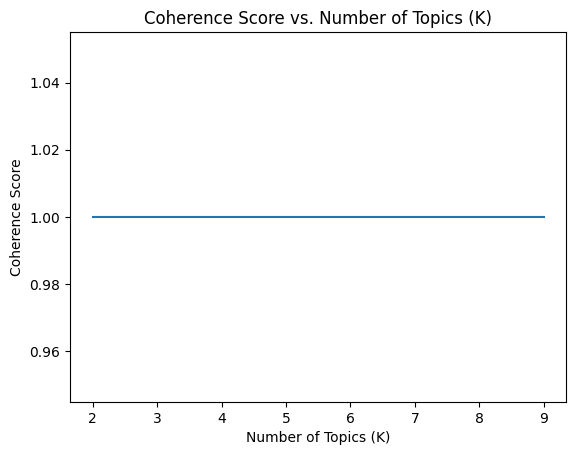

In [7]:
import numpy as np
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

# Define the data
data = "I loved the movie! The plot was amazing, and the acting was superb. Highly recommended!👌"
# Tokenize and preprocess the data
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = tokenizer.tokenize(text.lower())
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return filtered_tokens

processed_data = preprocess_text(data)

# Create Dictionary and Document Term Matrix
dictionary = corpora.Dictionary([processed_data])
corpus = [dictionary.doc2bow(processed_data)]

# Function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return model_list, coherence_values

# Determine the optimal number of topics
start = 2
limit = 10
step = 1
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=[processed_data], start=start, limit=limit, step=step)

optimal_index = np.argmax(coherence_values)
optimal_model = model_list[optimal_index]
optimal_num_topics = start + optimal_index * step

print("Optimal number of topics (K):", optimal_num_topics)
print("Coherence Score:", coherence_values[optimal_index])

# Print the topics
topics = optimal_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

import matplotlib.pyplot as plt

# Plot the coherence scores
plt.plot(range(start, limit, step), coherence_values)
plt.xlabel('Number of Topics (K)')
plt.ylabel('Coherence Score')
plt.title('Coherence Score vs. Number of Topics (K)')
plt.show()



## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [6]:
!pip install BERTopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 13.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 20.5 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 74.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/73

In [14]:

from sklearn.datasets import fetch_20newsgroups
input_docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']

In [15]:
from bertopic import BERTopic

bert_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = bert_model.fit_transform(input_docs)

2024-03-29 04:05:33,717 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/589 [00:00<?, ?it/s]

2024-03-29 04:45:26,797 - BERTopic - Embedding - Completed ✓
2024-03-29 04:45:26,799 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-29 04:46:13,410 - BERTopic - Dimensionality - Completed ✓
2024-03-29 04:46:13,413 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-29 04:47:09,237 - BERTopic - Cluster - Completed ✓
2024-03-29 04:47:09,278 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-29 04:47:16,218 - BERTopic - Representation - Completed ✓


In [16]:
frequency_of_topics = bert_model.get_topic_info();

In [17]:
bert_model.get_topic(0)

[('game', 0.010267827502575865),
 ('team', 0.008943059673556575),
 ('games', 0.007127493492529238),
 ('he', 0.00692298803402256),
 ('players', 0.006281122774460735),
 ('season', 0.0061761547325197026),
 ('hockey', 0.006078452241282182),
 ('play', 0.005733638281878909),
 ('25', 0.005593513466170075),
 ('year', 0.005543713817411911)]

In [18]:
bert_model.reduce_topics(input_docs, nr_topics=20)

2024-03-29 04:51:04,685 - BERTopic - Topic reduction - Reducing number of topics
2024-03-29 04:51:11,847 - BERTopic - Topic reduction - Reduced number of topics from 224 to 20


In [19]:
print(bert_model.topics_)

[1, 3, 0, 3, 3, -1, -1, 1, 1, -1, -1, -1, -1, 13, 9, 0, -1, 0, 0, 7, 5, 4, -1, 7, 1, -1, -1, -1, 3, 0, -1, 0, 4, 1, 8, 4, 3, 14, 7, -1, 9, 4, 11, 2, 1, -1, 3, 10, 2, -1, 3, 5, 0, 2, 14, 7, -1, -1, 2, 7, 1, -1, -1, 12, -1, 10, 1, -1, -1, -1, -1, 0, 5, 2, -1, -1, 1, 3, -1, 1, 10, 5, 4, 11, 3, -1, -1, 0, -1, 6, 1, 2, 6, 3, -1, 3, -1, -1, -1, -1, 12, -1, -1, 0, 2, 1, 3, -1, -1, -1, 4, 11, 9, 4, 0, 0, -1, 10, 1, -1, -1, 15, -1, -1, -1, -1, -1, 2, -1, 10, 0, 6, 0, 1, 3, 2, 3, 2, -1, 0, -1, 4, 0, 4, 14, 2, 4, 4, 1, -1, 7, 7, 3, 3, 6, -1, -1, 0, 9, 3, 4, 2, 10, -1, -1, 3, 6, 9, -1, 8, 3, -1, -1, -1, -1, -1, 1, -1, 7, 1, 7, 1, 0, -1, -1, 2, -1, 0, 0, -1, -1, 2, 2, 6, 2, 6, 0, -1, -1, 4, 6, -1, -1, -1, -1, 5, 2, 0, 3, 6, 7, -1, -1, -1, 7, 0, -1, -1, -1, 2, 1, 0, -1, 5, 2, -1, 2, 7, -1, 1, -1, 3, -1, 2, 1, -1, 6, 1, 1, 4, 16, 16, 8, -1, -1, 5, 2, 5, 6, 0, 3, 10, 2, 3, 4, 4, 10, -1, -1, -1, 16, -1, 3, -1, 3, -1, 3, 4, -1, 3, 3, -1, 2, 4, 8, -1, 0, -1, 3, 6, 8, 6, -1, 1, -1, 2, -1, 6, 3, -1, 3, -1,

In [20]:
bert_model.save("berttopic_model")
berttopic_model=BERTopic.load("berttopic_model")

2024-03-29 04:51:40,559 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [22]:
bert_model = BERTopic(embedding_model="xlm-r-bert-base-nli-stsb-mean-tokens")

In [23]:
from sentence_transformers import SentenceTransformer

sentn_mod = SentenceTransformer("distilbert-base-nli-mean-tokens", device="cpu")
bert_model = BERTopic(embedding_model=sentn_mod, verbose=True)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.02k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/450 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

In [ ]:
# Write your code here
# Then Explain the visualization

# Repeat for the other 2 visualizations as well.

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [ ]:
# Write your code here


# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
the learning experience is very exausting as there is a lot new concepts to be learned and its more intresting when i tried lkearning about the concept used on the backend of algorithem.its good to work especyially with the text data as we are able to understand what features or words are mainly making the effect on entire data decisions made. Yeah i have understaood all the algorithms used here however i faced few difficulties while running the code such as the dataset taking longer times to process and sometimes i dont get the expected results when i run the code on different datasets. especially the fourth question where i impliment the algorithm BERTopic it took longer times. in relevence to my field of study information scienvce where we dell with all kinds of data, mostly text data due to social media. As this assignment is dealing with text data where in we are extyracting the topics which is very much related to NLP.





'''